# Coupled Qubits: Secular Approximation Breakdown
Two qubits with exchange coupling J; when splittings become quasi-degenerate, Redfield secularization can fail.

c:\Users\leopo\anaconda3\envs\redfield\Lib\site-packages\qutip\core\environment.py:1647: UserWarning: The mpmath module is required for some operations on Ohmic environments, but it is not installed.
  warnings.warn(


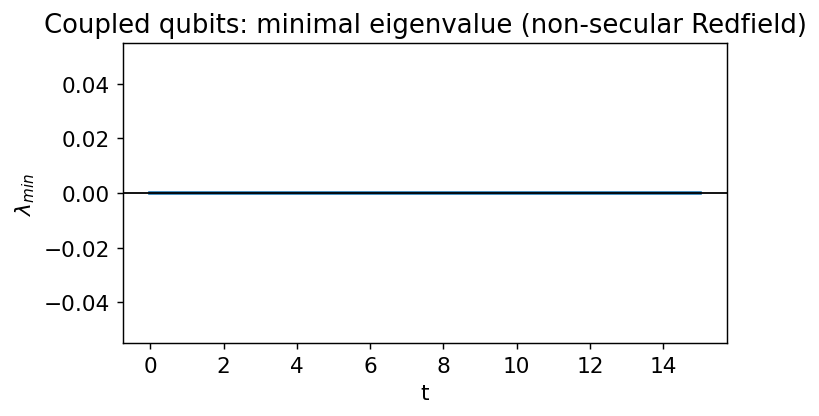

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from qutip import basis, tensor, sigmaz, sigmax, qeye, brmesolve, OhmicEnvironment

from diagnostics import trajectory_min_eigs

from plotting import style

style()

w1=1.0; w2=1.05

J=0.04  # comparable to decay -> near secular edge

sz=sigmaz(); sx=sigmax(); I=qeye(2)

H0=0.5*w1*tensor(sz,I)+0.5*w2*tensor(I,sz)+J*(tensor(sx,sx)+tensor(sz,sz)*0*0)  # simple XX coupling

A1=tensor(sz,I)

A2=tensor(I,sz)

bath=OhmicEnvironment(T=0.4, wc=10.0, alpha=0.04, s=1.0)

psi0=tensor(basis(2,1), basis(2,0))

tlist=np.linspace(0,15,400)

a_ops=[[A1,bath],[A2,bath]]

sol=brmesolve(H0, psi0, tlist, a_ops=a_ops)

min_eigs=trajectory_min_eigs(sol.states)

plt.figure(figsize=(6,3))

plt.plot(tlist,min_eigs)

plt.axhline(0,color='k',lw=1)

plt.xlabel('t')

plt.ylabel(r'$\lambda_{min}$')

plt.title('Coupled qubits: minimal eigenvalue (non-secular Redfield)')

plt.show()